In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
data = pd.read_csv("./assignment_basket.csv")
data = data.dropna()
data.head(20)

In [ ]:
data.columns

In [ ]:
data.Item.unique()

In [ ]:

# Transactions done in France
basket_weekday = (data[data['weekday_weekend'] =="weekday"]
            .groupby(['Transaction', 'period_day'])['Item']
            .sum().unstack().reset_index().fillna(0)
            .set_index('Transaction'))

# Transactions done in France
basket_weekend = (data[data['weekday_weekend'] =="weekend"]
            .groupby(['Transaction', 'period_day'])['Item']
            .sum().unstack().reset_index().fillna(0)
            .set_index('Transaction'))
basket_weekday

In [ ]:
def hot_encode(x):
    print(type(x), x)
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

In [96]:
# Encoding the datasets
basket_encoded = pd.get_dummies(basket_weekend)
# basket_encoded = basket_weekday.applymap(hot_encode)
basket_weekday = basket_encoded


# basket_encoded = basket_weekend.applymap(hot_encode)
basket_encoded = pd.get_dummies(basket_weekend)
basket_weekend = basket_encoded

In [97]:
basket_weekday

,afternoon_0,afternoon_Afternoon with the baker,afternoon_Alfajores,afternoon_AlfajoresAlfajores,afternoon_AlfajoresAlfajoresCoffee,afternoon_AlfajoresAlfajoresCoffeeCoffeeCoffee,afternoon_AlfajoresAlfajoresTea,afternoon_AlfajoresBread,afternoon_AlfajoresBreadMy-5 Fruit ShootJuice,afternoon_AlfajoresBreadTea,...,morning_Truffles,morning_TrufflesBreadCoffee,morning_TrufflesCoffeeThe Nomad,morning_Vegan mincepie,morning_Vegan mincepieCake,morning_Vegan mincepieCakeCoffeeCoffeeCoffee,night_0,night_Hot chocolateHot chocolate,night_Scandinavian,night_Vegan Feast
Transaction,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
# Building the model
frq_items = apriori(basket_weekday, min_support = 0.03, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
108,(morning_Bread),"(night_0, evening_0, afternoon_0)",0.064157,0.438253,0.064157,1.0,2.281787,0.036040,inf
122,(morning_Coffee),"(night_0, evening_0, afternoon_0)",0.042169,0.438253,0.042169,1.0,2.281787,0.023688,inf
28,(morning_Bread),"(evening_0, afternoon_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf
34,(morning_Coffee),"(evening_0, afternoon_0)",0.042169,0.440964,0.042169,1.0,2.267760,0.023574,inf
101,"(night_0, morning_Bread)","(evening_0, afternoon_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf


In [99]:
frq_items.head()

,support,itemsets
0,0.468675,(afternoon_0)
1,0.053614,(afternoon_Bread)
2,0.036747,(afternoon_Coffee)
3,0.972289,(evening_0)
4,0.561747,(morning_0)


In [100]:
frq_items = apriori(basket_weekend, min_support = 0.03, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
108,(morning_Bread),"(night_0, evening_0, afternoon_0)",0.064157,0.438253,0.064157,1.0,2.281787,0.036040,inf
122,(morning_Coffee),"(night_0, evening_0, afternoon_0)",0.042169,0.438253,0.042169,1.0,2.281787,0.023688,inf
28,(morning_Bread),"(evening_0, afternoon_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf
34,(morning_Coffee),"(evening_0, afternoon_0)",0.042169,0.440964,0.042169,1.0,2.267760,0.023574,inf
101,"(night_0, morning_Bread)","(evening_0, afternoon_0)",0.064157,0.440964,0.064157,1.0,2.267760,0.035866,inf


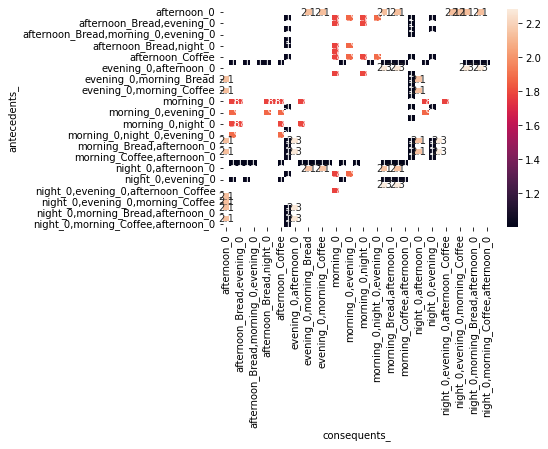

In [101]:
# Replace frozen sets with strings

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules.pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()